### World Happiness Report Analysis

### 1. Business understanding

In this project I try to find out if we really can understand happiness by relating it to different factors that are considered in the research literature to contribute to our happiness.

Looking into different resources, I've decided to use the data set of World <b>Happiness Report 2020</b> as it provides both happiness scores and 6 different factors that can be related to those happiness scores.

And to reach an answer to my main question <b>Can we understand happiness?</b> I've compiled this list of additional questions:
<ol>
<li>What are the happiest countries and regions in the world?</li>
<li>What are the averages of healthy life expectancy per region?</li>
<li>How are the six key factors correlate to happiness score?</li>
<li>Can we understand happiness?</li>    
</ol>

### 2. Data understanding

The data set is coming from the World Happiness Report which is defined as a landmark survey of the state of global happiness that ranks more than 150 countries by how happy their citizens perceive themselves to be.

By exploring the data set as followed in the next block, we can see that data recorded per country, each country has a happiness score and 6 quantitative variables that were calculated from the survey or from other official resources. And then other 6 columns that estimate to what extent each factor can explain the happiness score.

Also we can see that data is clean, it has no null values nor categorical variables. So it does not need any cleanup work.

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 200)

df = pd.read_csv('./2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [9]:
df.shape

(153, 20)

In [10]:
# Check null values
null_vals = df.columns[df.isnull().any()]
null_vals

Index([], dtype='object')

### 3. Data Preparation

Let's have a new data set that has only the country, region, happiness scores and the variables estimates that explain the happiness score.

Although for some analysis, I will need the orignal data set as well.

In [11]:
# Filter dataframe so that it has only the columns we are interested in and rename those columns
new_df = df[['Country name','Regional indicator','Ladder score','Explained by: Log GDP per capita',
             'Explained by: Social support','Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices','Explained by: Generosity',
             'Explained by: Perceptions of corruption','Dystopia + residual']]
new_df.set_axis(['Country', 'Region', 'Score', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Unexplained'], 
                axis='columns', inplace=True)

### 4. Analysis and Modeling

This project focuses on verifying whether we can understand happiness from data. There is no predection work will be done, as the data set is not suitable for predection because the variables are already put there to explain the happiness score. So it does not make sense to use them to predict happiness score.

#### 4.1. What are the happiest countries and regions in the world?

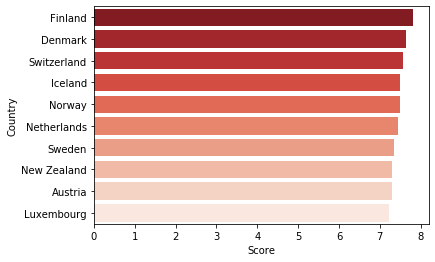

In [12]:
# Top 10 countries
sns.barplot(y='Country', x='Score', data=new_df[:10], palette='Reds_r')

In [13]:
# Group happiness score by region
score_by_region = new_df.groupby('Region')['Score'].mean().reset_index().sort_values('Score', ascending=False)
score_by_region

,Region,Score
5,North America and ANZ,7.173525
9,Western Europe,6.899219
3,Latin America and Caribbean,5.981786
0,Central and Eastern Europe,5.883818
2,East Asia,5.714850
7,Southeast Asia,5.383367
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.227159
6,South Asia,4.475443
8,Sub-Saharan Africa,4.383495


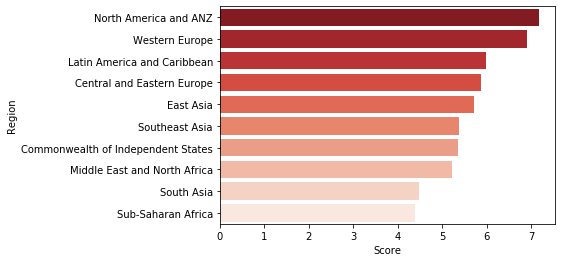

In [14]:
# Visualize happiness score by region
sns.barplot(y='Region', x='Score', data=score_by_region, palette='Reds_r')

#### 4.2. What are the averages of healthy life expectancy per region?

In [15]:
# Use the original dataframe to Group healthy life expectancy by region
health_by_region = df.groupby('Regional indicator')['Healthy life expectancy'].mean().round(2).reset_index().sort_values('Healthy life expectancy', ascending=False)
health_by_region

,Regional indicator,Healthy life expectancy
9,Western Europe,72.86
5,North America and ANZ,72.18
2,East Asia,71.09
0,Central and Eastern Europe,68.15
3,Latin America and Caribbean,66.72
4,Middle East and North Africa,65.31
1,Commonwealth of Independent States,64.73
7,Southeast Asia,64.71
6,South Asia,62.45
8,Sub-Saharan Africa,55.09


In [16]:
health_by_region.describe().round(2)

,Healthy life expectancy
count,10.00
mean,66.33
std,5.28
min,55.09
25%,64.72
50%,66.02
75%,70.36
max,72.86


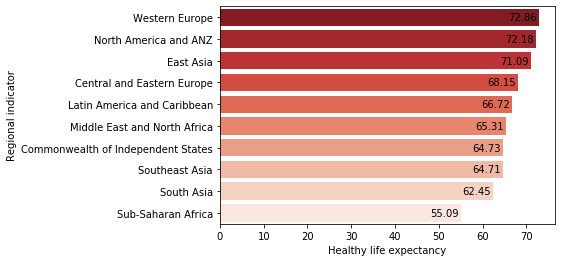

In [17]:
# Visualize happiness score by region
bar_plot = sns.barplot(y='Regional indicator', x='Healthy life expectancy', data=health_by_region, palette='Reds_r')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), (p.get_width() - 6, p.get_y() + p.get_height() / 2., ), 
                      ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')


#### 4.3. How are the six key factors correlate to happiness score?

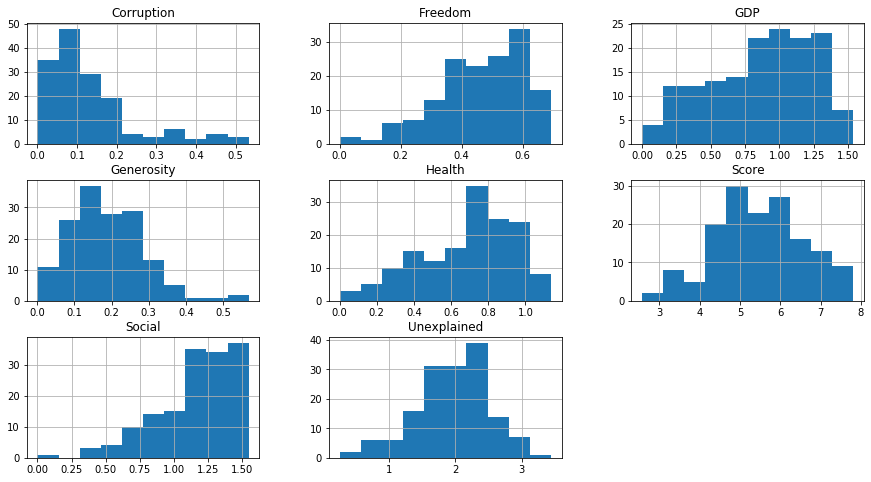

In [18]:
# Exploring the different variables
fig = new_df.hist(figsize=(15,8));


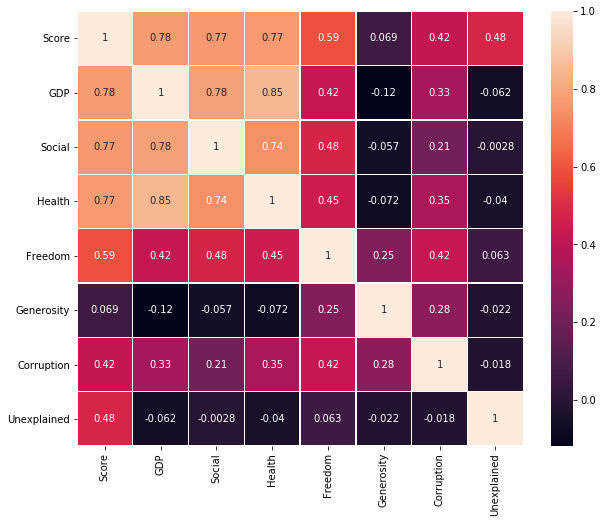

In [19]:
# Find correlation between the variables
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, ax=ax, linewidths=0.5,  annot_kws={'fontsize':10});

### 5. Evaluate the results

So from the previous analysis we can see that there are some key factors that can explain happiness score to a great extent, where the top 3 factors are GDP, Healthy life expectancy and Social support.

And there is still the unexplained happiness components factor, which indicates how much of the happiness score cannot be explained by the key factors.

This factor needs to be reduced by discovering more factors that contribute to happiness and complete the picture.